In [24]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r'C:\Users\\mwazir\OneDrive - hwlochner.com\Desktop\Crash data\crash.csv')

In [25]:
df.head()

,REPORT_NUMBER,CRASH_YEAR,CRASH_DATE_AND_TIME,REPORT_DATE_AND_TIME,INVESTIGATING_AGENCY_REPORT_NUMBER,FORM_TYPE,TOTAL_NUMBER_OF_VEHICLES,TOTAL_NUMBER_OF_PERSONS,COUNTY_CODE,DOT_COUNTY_CODE,...,D2_DR_ALC_TST_CD,D2_DR_ALC_TST_TYP_CD,D2_DR_ALC_TST_RSLT_CD,D2_DR_BAC_NUM,D2_DR_SUSP_DRUG_USE_CD,D2_DR_DRUG_TST_CD,D2_DR_DRUG_TST_TYP_CD,D2_DR_DRUG_TST_RSLT_CD,D2_DR_TRNSP_SRCE_CD,D2_DR_VIOL_ISSUE_CD
0,89646901.0,2023.0,5/24/2023 19:29,5/24/2023 22:19,FHP23ON0271979,L,2.0,2.0,4.0,15.0,...,Test Not Given,NaN,NaN,NaN,N,Test Not Given,NaN,NaN,EMS,N
1,25002028.0,2022.0,11/11/2022 15:50,11/11/2022 16:08,FHP22ON0583696,S,2.0,3.0,4.0,15.0,...,Test Not Given,NaN,NaN,NaN,N,Test Not Given,NaN,NaN,Not Transported,N
2,88410587.0,2021.0,1/28/2021 16:57,1/28/2021 17:49,FHPC21OFF009059,L,2.0,2.0,4.0,15.0,...,Test Not Given,NaN,NaN,NaN,N,Test Not Given,NaN,NaN,Not Transported,N
3,88524209.0,2021.0,9/26/2021 22:30,9/26/2021 23:19,FHPC21OFF100456,S,2.0,2.0,4.0,15.0,...,Test Not Given,NaN,NaN,NaN,N,Test Not Given,NaN,NaN,Not Transported,N
4,24885822.0,2022.0,9/20/2022 14:55,9/20/2022 15:41,FHP22ON0481769,L,2.0,1.0,4.0,15.0,...,Test Not Given,NaN,NaN,NaN,N,Test Not Given,NaN,NaN,Not Transported,N


In [26]:
data_list = df.head().to_numpy().tolist()

In [27]:
print(data_list)

[[89646901.0, 2023.0, '5/24/2023 19:29', '5/24/2023 22:19', 'FHP23ON0271979', 'L', 2.0, 2.0, 4.0, 15.0, 0.0, 'Pinellas', 'Unincorporated', 7.0, 'Urban', '5/24/2023 19:32', '5/24/2023 21:59', '5/24/2023 22:15', '5/24/2023 23:47', 'Y', 'Law Enforcement', 'I-275 (SR 93)', nan, 27.81016985, -82.66398801, 25257462.0, 569.0, 0.107, 'South', '38TH AVE N', nan, 7.254, 'Interstate', 15190000.0, 'Left', '3rd thru lane from center', nan, nan, "Not At Intersection/RR X'ing/Bridge", nan, nan, 'Preliminary', 'Paved', 'Not at Intersection', 'N', 'Dusk', 'Rain', 'Wet', 'N', 'Front to Rear', 'Motor Vehicle in Transport', 'On Roadway', 'N', 'Non-Junction', nan, nan, nan, nan, nan, nan, 'N', nan, nan, nan, nan, 'TPR', 'Florida Highway Patrol', 'Florida Highway Patrol (FHP)', '5/26/2023 14:52', 'Y', 'Rear End', 'Rear End', 'Serious Injury', 'Incapacitating Injury', 'NIGHT', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0

In [28]:
df.describe()

,REPORT_NUMBER,CRASH_YEAR,TOTAL_NUMBER_OF_VEHICLES,TOTAL_NUMBER_OF_PERSONS,COUNTY_CODE,DOT_COUNTY_CODE,CITY_CODE,MANAGING_DOT_DISTRICT,STREET_ADDRESS_NUMBER,LATITUDE,...,D2_DR_ROW_POS_CD,D2_DR_SEAT_POS_CD,D2_DR_OTH_POS_CD,D2_DR_HLMT_USE_CD,D2_DR_EYE_PRTCT_CD,D2_DR_ALC_TST_TYP_CD,D2_DR_ALC_TST_RSLT_CD,D2_DR_BAC_NUM,D2_DR_DRUG_TST_TYP_CD,D2_DR_DRUG_TST_RSLT_CD
count,4.290000e+02,429.000000,429.000000,429.000000,429.0,429.0,429.000000,429.0,0.0,430.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.902639e+07,2019.184149,1.937063,2.491841,4.0,15.0,34.550117,7.0,NaN,27.842458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.122204e+07,2.113846,0.750857,1.632913,0.0,0.0,31.814377,0.0,NaN,0.031341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.488460e+07,2016.000000,1.000000,0.000000,4.0,15.0,0.000000,7.0,NaN,27.806914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.536429e+07,2017.000000,2.000000,2.000000,4.0,15.0,0.000000,7.0,NaN,27.820244,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,8.724383e+07,2019.000000,2.000000,2.000000,4.0,15.0,64.000000,7.0,NaN,27.822177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.832672e+07,2021.000000,2.000000,3.000000,4.0,15.0,64.000000,7.0,NaN,27.880866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,8.966015e+07,2023.000000,6.000000,14.000000,4.0,15.0,65.000000,7.0,NaN,27.890951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
crash_type_counts = df['S4_CRASH_TYPE'].value_counts()

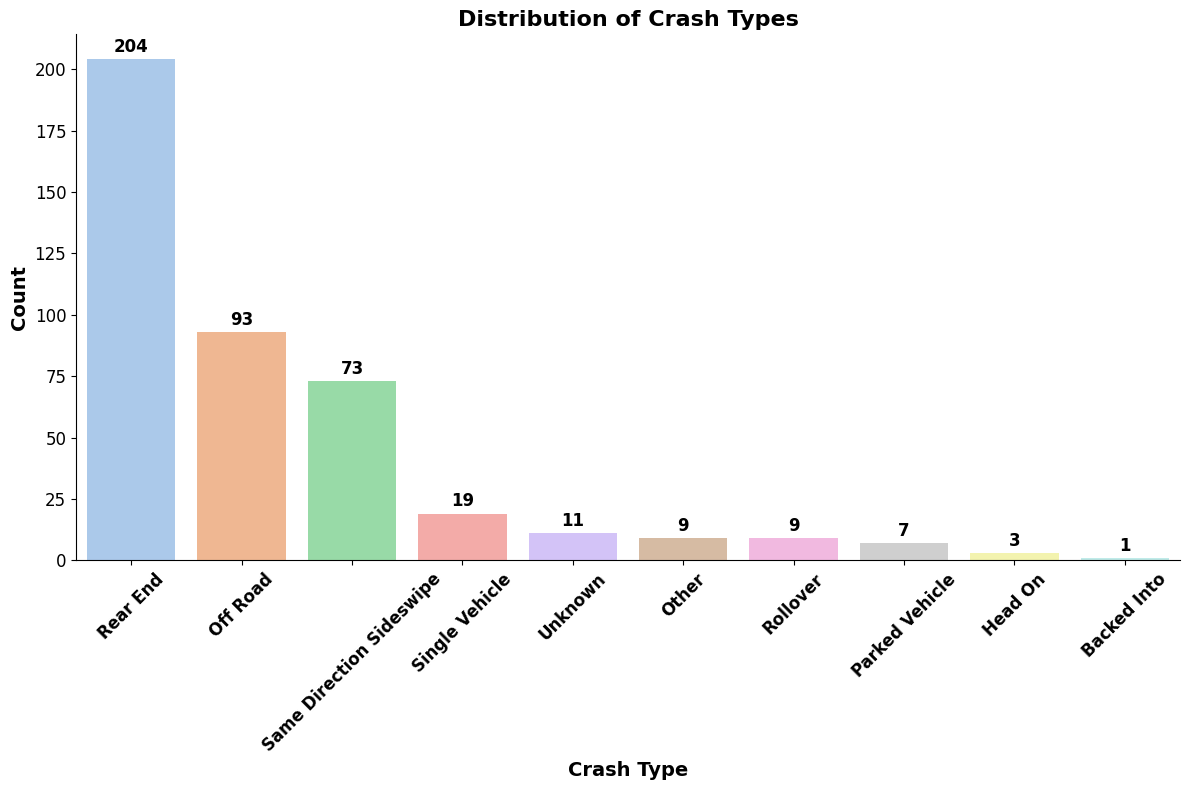

In [30]:
# Set a custom color palette for the plot
colors = sns.color_palette('pastel')

# Create a bar plot with customized style
plt.figure(figsize=(12, 8))  # Increase the figure size
ax = sns.barplot(x=crash_type_counts.index, y=crash_type_counts.values, palette=colors)

# Customize the plot elements
plt.title('Distribution of Crash Types', fontsize=16,fontweight='bold')
plt.xlabel('Crash Type', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.xticks(rotation=45, fontsize=12,fontweight='bold')  # Rotate and adjust font size for x-axis labels
plt.yticks(fontsize=12)  # Adjust font size for y-axis labels

# Add data labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height() + 5),
                ha='center', va='center', fontsize=12,fontweight='bold')

# Remove top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

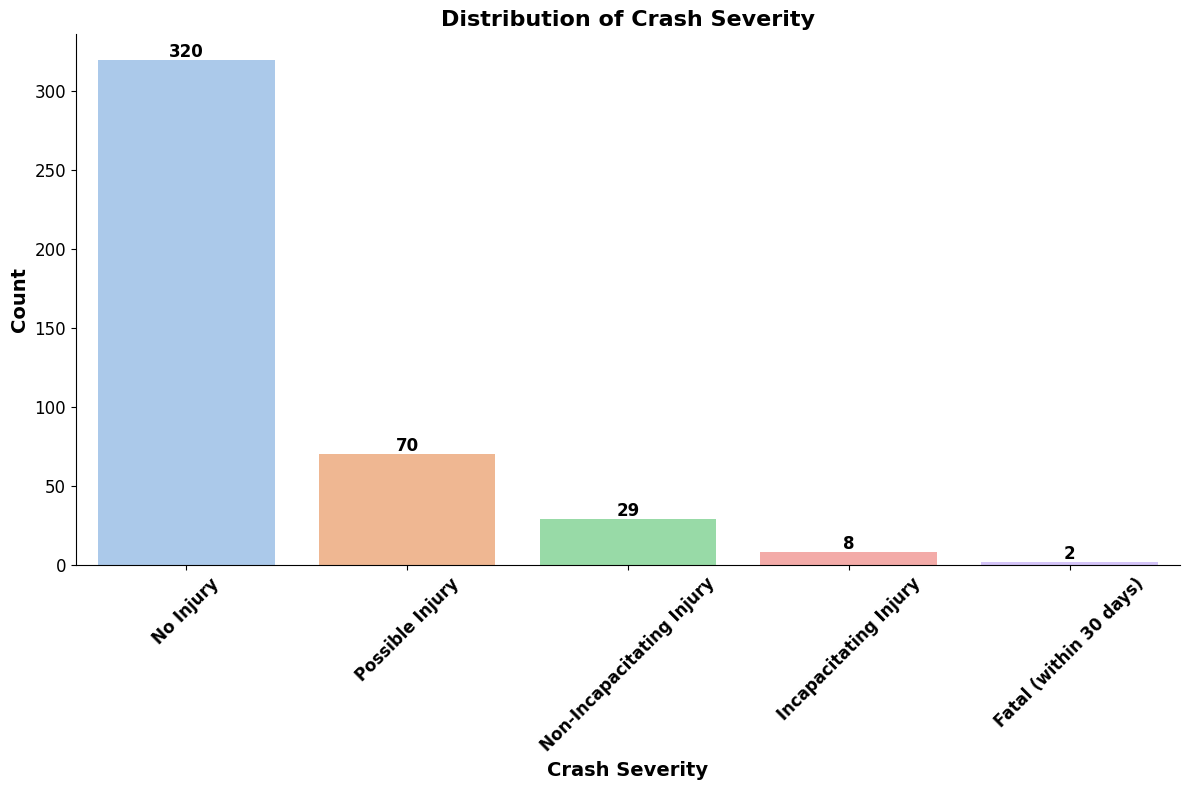

In [31]:
crash_type_counts = df['S4_CRASH_SEVERITY_DETAIL'].value_counts()
# Set a custom color palette for the plot
colors = sns.color_palette('pastel')

# Create a bar plot with customized style
plt.figure(figsize=(12, 8))  # Increase the figure size
ax = sns.barplot(x=crash_type_counts.index, y=crash_type_counts.values, palette=colors)

# Customize the plot elements
plt.title('Distribution of Crash Severity', fontsize=16,fontweight='bold')
plt.xlabel('Crash Severity', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.xticks(rotation=45, fontsize=12,fontweight='bold')  # Rotate and adjust font size for x-axis labels
plt.yticks(fontsize=12)  # Adjust font size for y-axis labels

# Add data labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height() + 5),
                ha='center', va='center', fontsize=12,fontweight='bold')

# Remove top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

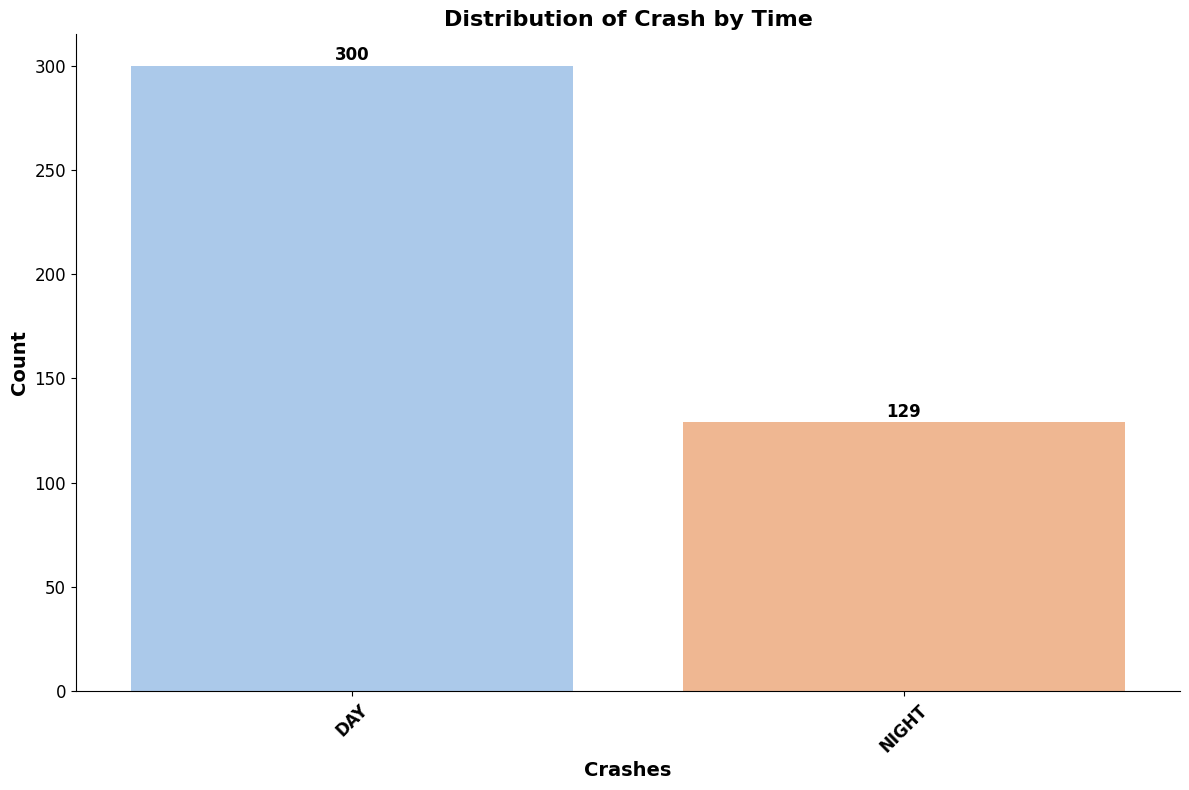

In [32]:
crash_type_counts = df['S4_DAY_OR_NIGHT'].value_counts()
# Set a custom color palette for the plot
colors = sns.color_palette('pastel')

# Create a bar plot with customized style
plt.figure(figsize=(12, 8))  # Increase the figure size
ax = sns.barplot(x=crash_type_counts.index, y=crash_type_counts.values, palette=colors)

# Customize the plot elements
plt.title('Distribution of Crash by Time', fontsize=16,fontweight='bold')
plt.xlabel('Crashes', fontsize=14,fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')
plt.xticks(rotation=45, fontsize=12,fontweight='bold')  # Rotate and adjust font size for x-axis labels
plt.yticks(fontsize=12)  # Adjust font size for y-axis labels

# Add data labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height() + 5),
                ha='center', va='center', fontsize=12,fontweight='bold')

# Remove top and right spines
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

chi-squared test 

In [35]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your crash data CSV file into a DataFrame
df = pd.read_csv('crash.csv')

# Create a contingency table (cross-tabulation) of crash type vs. time period
contingency_table = pd.crosstab(df['S4_CRASH_TYPE_SIMPLIFIED'], df['S4_DAY_OR_NIGHT'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

Chi-squared statistic: 49.332499515558446
P-value: 6.396426910098549e-09
Degrees of freedom: 6
Expected frequencies table:
[[  2.0979021    0.9020979 ]
 [ 65.03496503  27.96503497]
 [ 25.17482517  10.82517483]
 [142.65734266  61.34265734]
 [  6.29370629   2.70629371]
 [ 51.04895105  21.95104895]
 [  7.69230769   3.30769231]]
